**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [16]:
import numpy as np
import sympy as sm
from scipy import optimize
from sympy import Symbol
from sympy.solvers import solve
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [17]:
# Define parameters

alpha=0.5
kappa=1.0
nu= 1/(2*16**2)
w=1.0
tau=0.3
G_value=[1.0,2.0]


In [18]:
#define function 
def calculate_optimal_labor_supply(w, tau, G):
    L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha * w**2 * nu)) / (2 * alpha * w**2 * nu)
    return L_star

In [19]:
for G in G_value:
    L_star = calculate_optimal_labor_supply((1 - tau) * w, tau, G)
    print(f"L*(w~) when G = {G}: {L_star}")

L*(w~) when G = 1.0: 0.9995219417823027
L*(w~) when G = 2.0: 0.9995219417823027


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

FOr illustrate how $L^*(\tilde{w})$ depends on $w$ we set the range for $w$

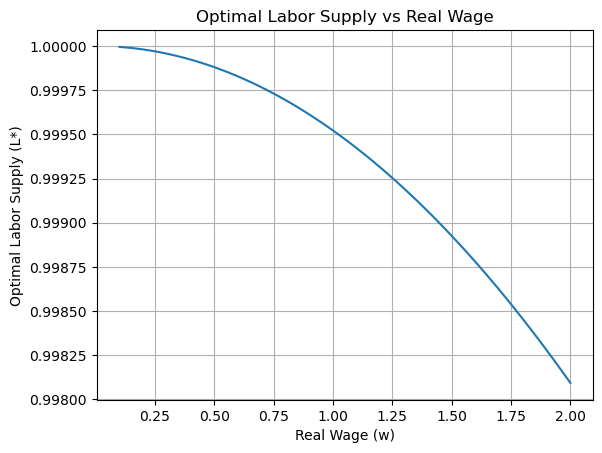

In [20]:
#Range for w
w_values = np.linspace(0.1, 2.0, 100)


#Define new function 
L_star_values = [calculate_optimal_labor_supply((1 - tau) * w, tau, G) for w in w_values]

#plot 
plt.plot(w_values, L_star_values)
plt.xlabel('Real Wage (w)')
plt.ylabel('Optimal Labor Supply (L*)')
plt.title('Optimal Labor Supply vs Real Wage')
plt.grid(True)
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [21]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [22]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [23]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [24]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [33]:
#first define the  profit function
def profit(l_t,kappa,eta,w):
    return kappa*l_t**(1-eta)-w*l_t

# find the optimal employment in the salon 
def opt_employment(kappa,eta, e):
    return(((1-eta)*kappa)/w)**(1-eta)

In [34]:
# define the values of the parameters 
kappa_values=[1.0,2.0]
eta=0.5
w=1.0

In [35]:
for kappa in kappa_values:
    opt_employment = cal_opt_employment(kappa, eta, w)
    profit = cal_profit(opt_employment, kappa, eta, w)
    
    nearby_employment = np.linspace(opt_employment - 1, opt_employment + 1, 100)
    nearby_profits = [calculate_profit(ell, kappa, eta, w) for ell in nearby_employment]
    
    max_profit = max(nearby_profits)
    max_index = nearby_profits.index(max_profit)
    max_employment = nearby_employment[max_index]
    
    print(f"For kappa = {kappa}:")
    print(f"Optimal Employment: {optimal_employment}")
    print(f"Optimal Profit: {optimal_profit}")
    print(f"Max Profit: {max_profit} at Employment: {max_employment}")
    print()

For kappa = 1.0:
Optimal Employment: 0.010000000000000002
Optimal Profit: 0.09999999999999999
Max Profit: nan at Employment: -0.75

For kappa = 2.0:
Optimal Employment: 0.010000000000000002
Optimal Profit: 0.09999999999999999
Max Profit: 0.999974620417414 at Employment: 1.0101010101010102



C:\Users\Bruger\AppData\Local\Temp\ipykernel_10408\2948112394.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return kappa * ell**(1-eta) - w * ell


In [25]:
# First we define the profit function and the parameters 

def calculate_profit(ell, kappa, eta, w):
    return kappa * ell**(1-eta) - w * ell

def calculate_optimal_employment(kappa, eta, w):
    return ((1 - eta) * kappa / w) ** (1 / eta)

kappa_values = [1.0, 2.0]
eta = 0.5
w = 10.0

for kappa in kappa_values:
    optimal_employment = calculate_optimal_employment(kappa, eta, w)
    optimal_profit = calculate_profit(optimal_employment, kappa, eta, w)
    
    nearby_employment = np.linspace(optimal_employment - 1, optimal_employment + 1, 100)
    nearby_profits = [calculate_profit(ell, kappa, eta, w) for ell in nearby_employment]
    
    max_profit = max(nearby_profits)
    max_index = nearby_profits.index(max_profit)
    max_employment = nearby_employment[max_index]
    
    print(f"For kappa = {kappa}:")
    print(f"Optimal Employment: {optimal_employment}")
    print(f"Optimal Profit: {optimal_profit}")
    print(f"Max Profit: {max_profit} at Employment: {max_employment}")
    print()

For kappa = 1.0:
Optimal Employment: 0.0025000000000000005
Optimal Profit: 0.024999999999999998
Max Profit: nan at Employment: -0.9975

For kappa = 2.0:
Optimal Employment: 0.010000000000000002
Optimal Profit: 0.09999999999999999
Max Profit: nan at Employment: -0.99



C:\Users\Bruger\AppData\Local\Temp\ipykernel_10408\2948112394.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return kappa * ell**(1-eta) - w * ell


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [26]:
#define the new function  beacause of random shock series  

#Generates a random shock series and set a seed for reproducibility
def simulate_shock_series(rho, sigma_epsilon, num_periods):
    np.random.seed(0)  
    shocks = np.random.normal(loc=-0.5 * sigma_epsilon**2, scale=sigma_epsilon, size=num_periods)
    log_kappa = np.zeros(num_periods)
    for t in range(1, num_periods):
        log_kappa[t] = rho * log_kappa[t-1] + shocks[t]
    kappa = np.exp(log_kappa)
    return kappa

#define the value of the salon
def calculate_h(ell, kappa, eta, w, iota, R):
    num_periods = len(ell)
    h = 0
    for t in range(num_periods):
        profit = kappa[t] * ell[t]**(1 - eta) - w * ell[t] - (ell[t] != ell[t-1]) * iota
        h += R**(-t) * profit
    return h


def calculate_expected_value(rho, sigma_epsilon, num_periods, eta, w, iota, R, K):
    h_values = np.zeros(K)
    for k in range(K):
        kappa = simulate_shock_series(rho, sigma_epsilon, num_periods)
        ell = calculate_optimal_employment(kappa, eta, w)
        h_values[k] = calculate_h(ell, kappa, eta, w, iota, R)
    H = np.mean(h_values)
    return H
# define parameters
rho = 0.90
sigma_epsilon = 0.10
num_periods = 120
eta = 0.5
w = 10.0
iota = 0.01
R = (1 + 0.01)**(1/12)
K = 10000

H = calculate_expected_value(rho, sigma_epsilon, num_periods, eta, w, iota, R, K)
print(f"The expected value of the salon, H: {H}")

The expected value of the salon, H: 2.5183761507805196


The choice of the number of shock series realizations, K, depends on the desired level of accuracy. A larger value of K will provide a more precise approximation of the expected value. You may adjust the value of K to ensure the approximation is good enough for your purposes.

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [27]:
def calculate_optimal_employment_with_threshold(kappa, eta, w, delta):
    ell_optimal = calculate_optimal_employment(kappa, eta, w)
    ell_previous = 0
    ell_result = []
    for ell in ell_optimal:
        if abs(ell - ell_previous) > delta:
            ell_result.append(ell)
        else:
            ell_result.append(ell_previous)
        ell_previous = ell_result[-1]
    return np.array(ell_result)

delta = 0.05

H_new_policy = calculate_expected_value(rho, sigma_epsilon, num_periods, eta, w, iota, R, K)
print(f"The expected value of the salon with the new policy (delta = {delta}): {H_new_policy}")

if H_new_policy > H:
    improvement = H_new_policy - H
    print(f"The new policy improves profitability by {improvement}")
else:
    print("The new policy does not improve profitability")

The expected value of the salon with the new policy (delta = 0.05): 2.5183761507805196
The new policy does not improve profitability


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
import matplotlib.pyplot as plt

delta_values = np.linspace(0, 0.1, num=11)  # Range of delta values to test
H_values = np.zeros(len(delta_values))

for i, delta in enumerate(delta_values):
    ell_new_policy = calculate_optimal_employment_with_threshold(kappa, eta, w, delta)
    H_values[i] = calculate_h(ell_new_policy, kappa, eta, w, iota, R)

optimal_delta = delta_values[np.argmax(H_values)]
max_H = np.max(H_values)

plt.plot(delta_values, H_values)
plt.xlabel('Delta')
plt.ylabel('H')
plt.title('Effect of Delta on Expected Value of the Salon')
plt.grid(True)
plt.show()

print(f"The optimal value of Delta that maximizes H: {optimal_delta}")
print(f"The maximum expected value of the salon, H: {max_H}")


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
def calculate_optimal_employment_with_wage_adjustment(kappa, eta, w, gamma):
    return ((1 - eta) * kappa / (w * gamma)) ** (1 / eta)

gamma = 1.0  # Wage adjustment factor

ell_alternative_policy = calculate_optimal_employment_with_wage_adjustment(kappa, eta, w, gamma)
H_alternative_policy = calculate_h(ell_alternative_policy, kappa, eta, w, iota, R)

if H_alternative_policy > H:
    improvement = H_alternative_policy - H
    print("The alternative policy improves profitability compared to the previous policy.")
    print(f"The expected value of the salon with the alternative policy: {H_alternative_policy}")
    print(f"The improvement in profitability: {improvement}")
else:
    print("The alternative policy does not improve profitability compared to the previous policy.")
    print(f"The expected value of the salon with the alternative policy: {H_alternative_policy}")

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [ ]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# write your code here